### Project Title : To predict the price of cars using ML regression models

### Business Goal:

To model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1 : Read and undertand the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt

In [3]:
# Load the dataset and read top five rows in dataset

df = pd.read_csv("Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Read the bottom five rows in the dataset

df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
# check data dimension

df.shape

(205, 26)

In [6]:
# check data types

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Step 2 : Data Cleaning and Dealing with outliers

In [7]:
# this shows how many "?" are present.
# normalized-losses column is best dropped as it has too many blanks.

df.replace(to_replace="?",value=np.NaN).isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.drop('normalized-losses',axis=1, inplace=True)

In [9]:
# replace ? with NaN that python recognizes as missing value
df.replace(to_replace="?",value=np.NaN,inplace=True)

In [10]:
df.dropna(inplace = True)

In [11]:
# these steps have changed shape of data
df.shape

(193, 25)

In [12]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
# check price column
df.price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 193, dtype: object

In [14]:
# make it integer
df.price.astype('int64')

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 193, dtype: int64

In [15]:
df.price = df.price.astype('int64')

In [16]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [17]:
# check descriptive statistics of numeric columns

df.select_dtypes(include="number").head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450


In [18]:
df_num = df.select_dtypes(include="number")

In [19]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   wheel-base         193 non-null    float64
 2   length             193 non-null    float64
 3   width              193 non-null    float64
 4   height             193 non-null    float64
 5   curb-weight        193 non-null    int64  
 6   engine-size        193 non-null    int64  
 7   compression-ratio  193 non-null    float64
 8   city-mpg           193 non-null    int64  
 9   highway-mpg        193 non-null    int64  
 10  price              193 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 18.1 KB


In [20]:
# does not show any null values, there may be non standard null values like "?"

In [21]:
df_num.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565,13285.025907
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910,8089.082886
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000,7738.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000,16515.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [22]:
# the columns have varied range of values. makes a case for rescaling.
# Q1-Q2-Q3 appear evenly spread out.
# compression ration max is far apart compared to other values.
# height, weight have a low coeff of variation.

In [23]:
# remove rows which have outlier values in any of the numeric columns
# IQR method.

In [24]:
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1

# ~ represents NOT or Exclude such rows
df[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


In [25]:
for i in df_num.columns:
    print(i)

symboling
wheel-base
length
width
height
curb-weight
engine-size
compression-ratio
city-mpg
highway-mpg
price


In [26]:
# Method 2:
# remove rows in entire df using each column

for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df_num[i] < Q1 - 1.5 * IQR) | (df_num[i] > Q3 + 1.5 * IQR))]

In [27]:
df.shape

(150, 25)

In [28]:
# check descriptive statistics of catagorical columns
df_cat = df.select_dtypes(include="object")

In [29]:
df_cat.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,150,150,150,150,150,150,150,150,150,150,150,150,150,150
unique,19,1,2,2,5,3,1,5,3,5,28,27,39,15
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.15,68,5500
freq,29,150,135,86,67,97,150,115,132,71,20,14,17,32


In [30]:
# engine-location is nearly all front.

### Step 3 : Data Preprocessing : Analyzing and Encoding categorical columns

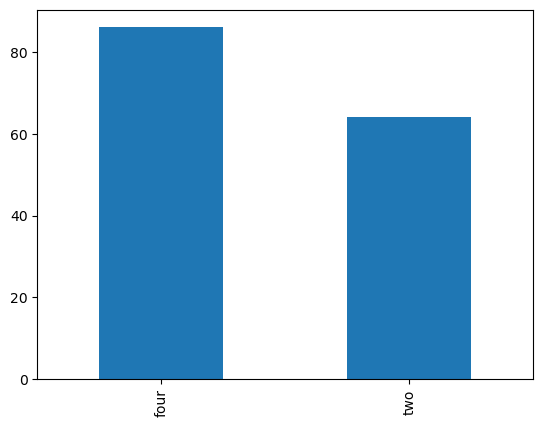

In [31]:
# how many rows present for each value in a category column
df['num-of-doors'].value_counts().plot(kind='bar');

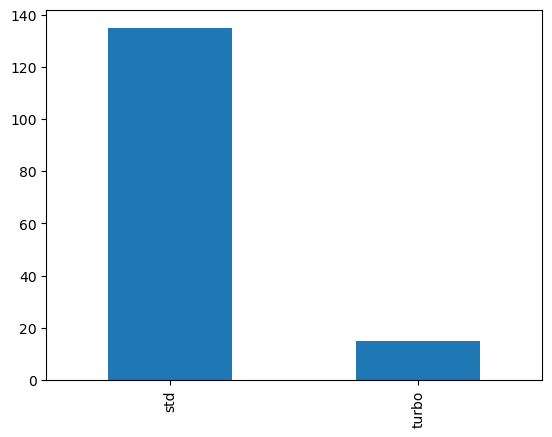

In [32]:
df['aspiration'].value_counts().plot(kind='bar');

<AxesSubplot:>

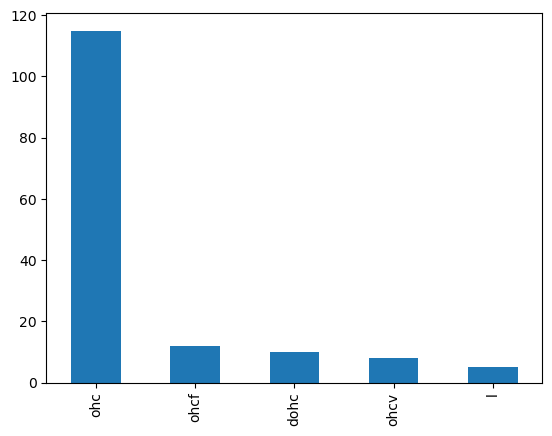

In [33]:
# same for engine type
df['engine-type'].value_counts().plot(kind='bar')

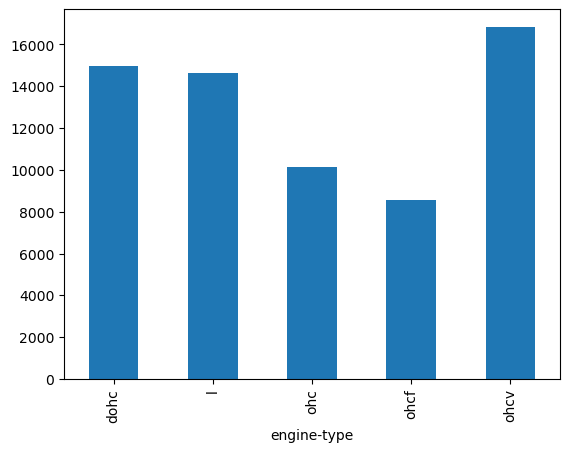

In [34]:
df.groupby(['engine-type']).mean()['price'].plot(kind='bar');

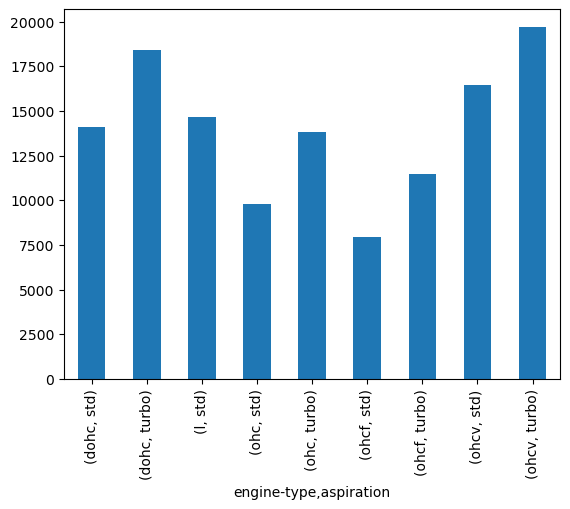

In [35]:
# mean of price for each engine type
df.groupby(['engine-type','aspiration']).mean()['price'].plot(kind='bar');

In [36]:
# Encoding categorical columns
# Consider label encoding if the values are in interval scale else one hot encoding

<AxesSubplot:>

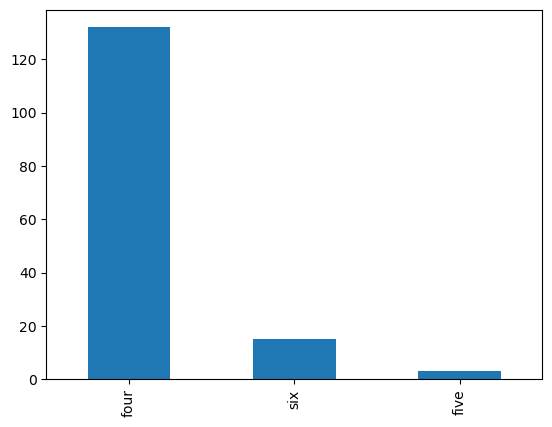

In [37]:
# this may be a candidate for label encoding. even this can be one hot encoded.
# this may be a candidate for label encoding. even this can be one hot encoded.
df['num-of-cylinders'].value_counts().plot(kind='bar')

In [38]:
df['num-of-cylinders'].value_counts()

four    132
six      15
five      3
Name: num-of-cylinders, dtype: int64

In [39]:
OHE = OneHotEncoder()
OHE.fit_transform(df_cat).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
OHE.get_feature_names_out()

array(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_mazda',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_std', 'aspiration_turbo', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-type_dohc', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'fuel-system_1bbl', 'fuel-system_2bbl',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi',
       'bore_2.54', 'bore_2.68', 'bore_2.91', 

In [41]:
df_cat_ohe = pd.DataFrame(OHE.fit_transform(df_cat).toarray(), columns=OHE.get_feature_names_out())

In [42]:
df_cat_ohe.shape

(150, 155)

In [43]:
df_cat_ohe.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_mazda,make_mercury,make_mitsubishi,...,peak-rpm_5000,peak-rpm_5100,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5800,peak-rpm_6000,peak-rpm_6600
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Step 5 : Univariate and Bivariate Analysis

In [44]:
# observe the distribution of numeric columns
# is the column skewed? is it normal in shape? are there outliers? are there gaps in the distribution?

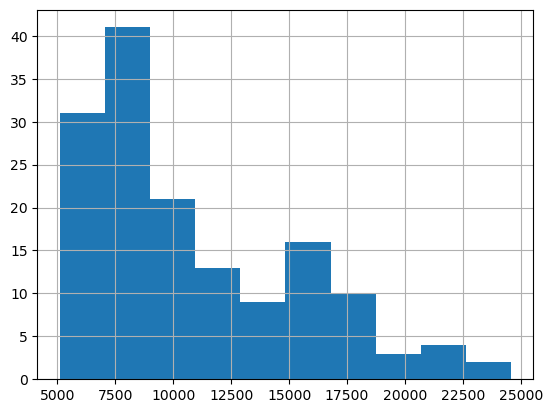

In [45]:
df['price'].hist();

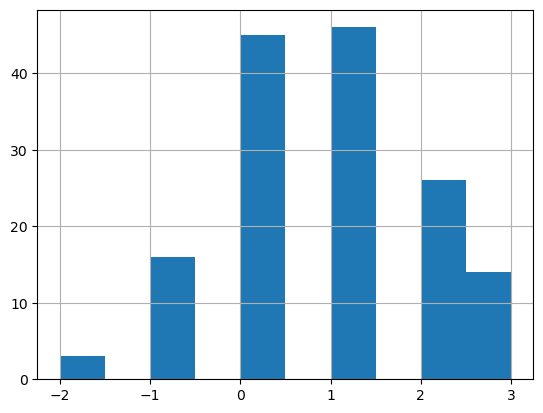

In [46]:
# this is a candidate for label encoding. it is not really a numeric column.
df['symboling'].hist();

<AxesSubplot:>

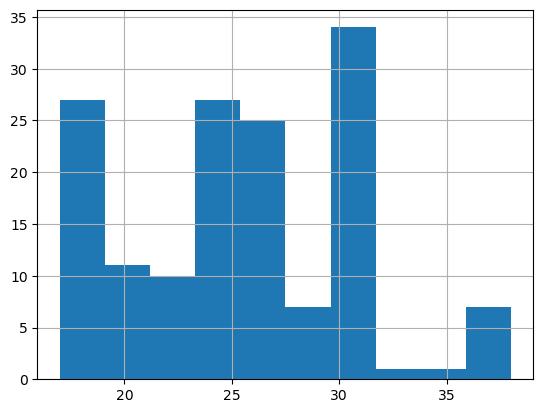

In [47]:
df['city-mpg'].hist()

In [48]:
# for other columns also
df_num.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [49]:
# most of the univariate analysis is already done earlier. some more like boxplot presented here.

<AxesSubplot:>

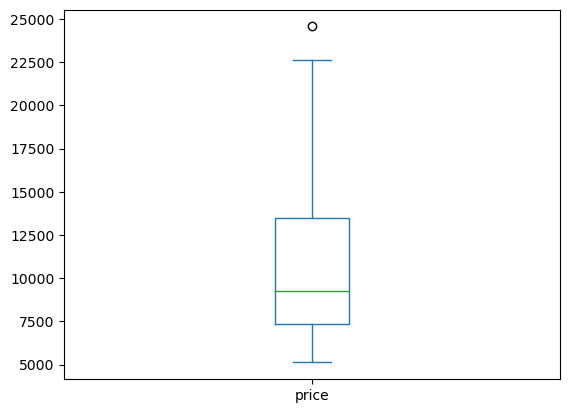

In [50]:
df.price.plot(kind='box')

In [51]:
# there are some outliers in price column
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3-Q1

# to get a count of such rows
len(df.price[df.price > Q3 + 1.5*IQR])
# can ignore as it is not too far above cut off and just one row.

1

<AxesSubplot:>

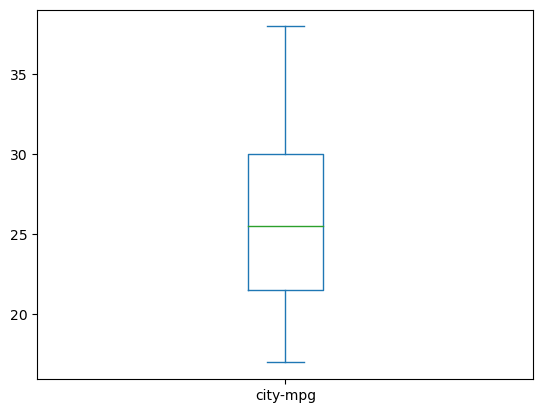

In [52]:
df['city-mpg'].plot(kind='box')

<AxesSubplot:xlabel='aspiration', ylabel='price'>

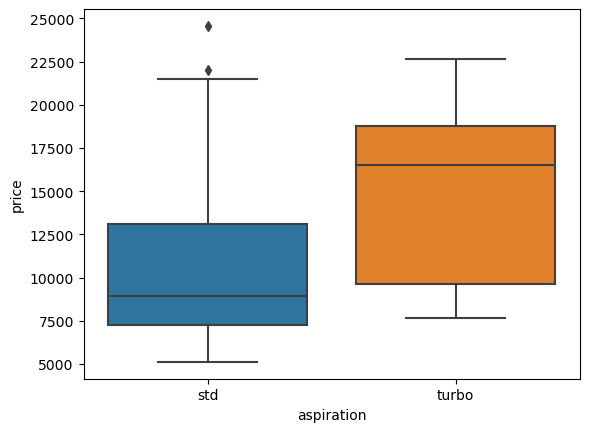

In [53]:
# consider categorical data and numeric to check if distributions are different. we can see that in aspiration and price.
sns.boxplot(x = df['aspiration'],y = df['price'])

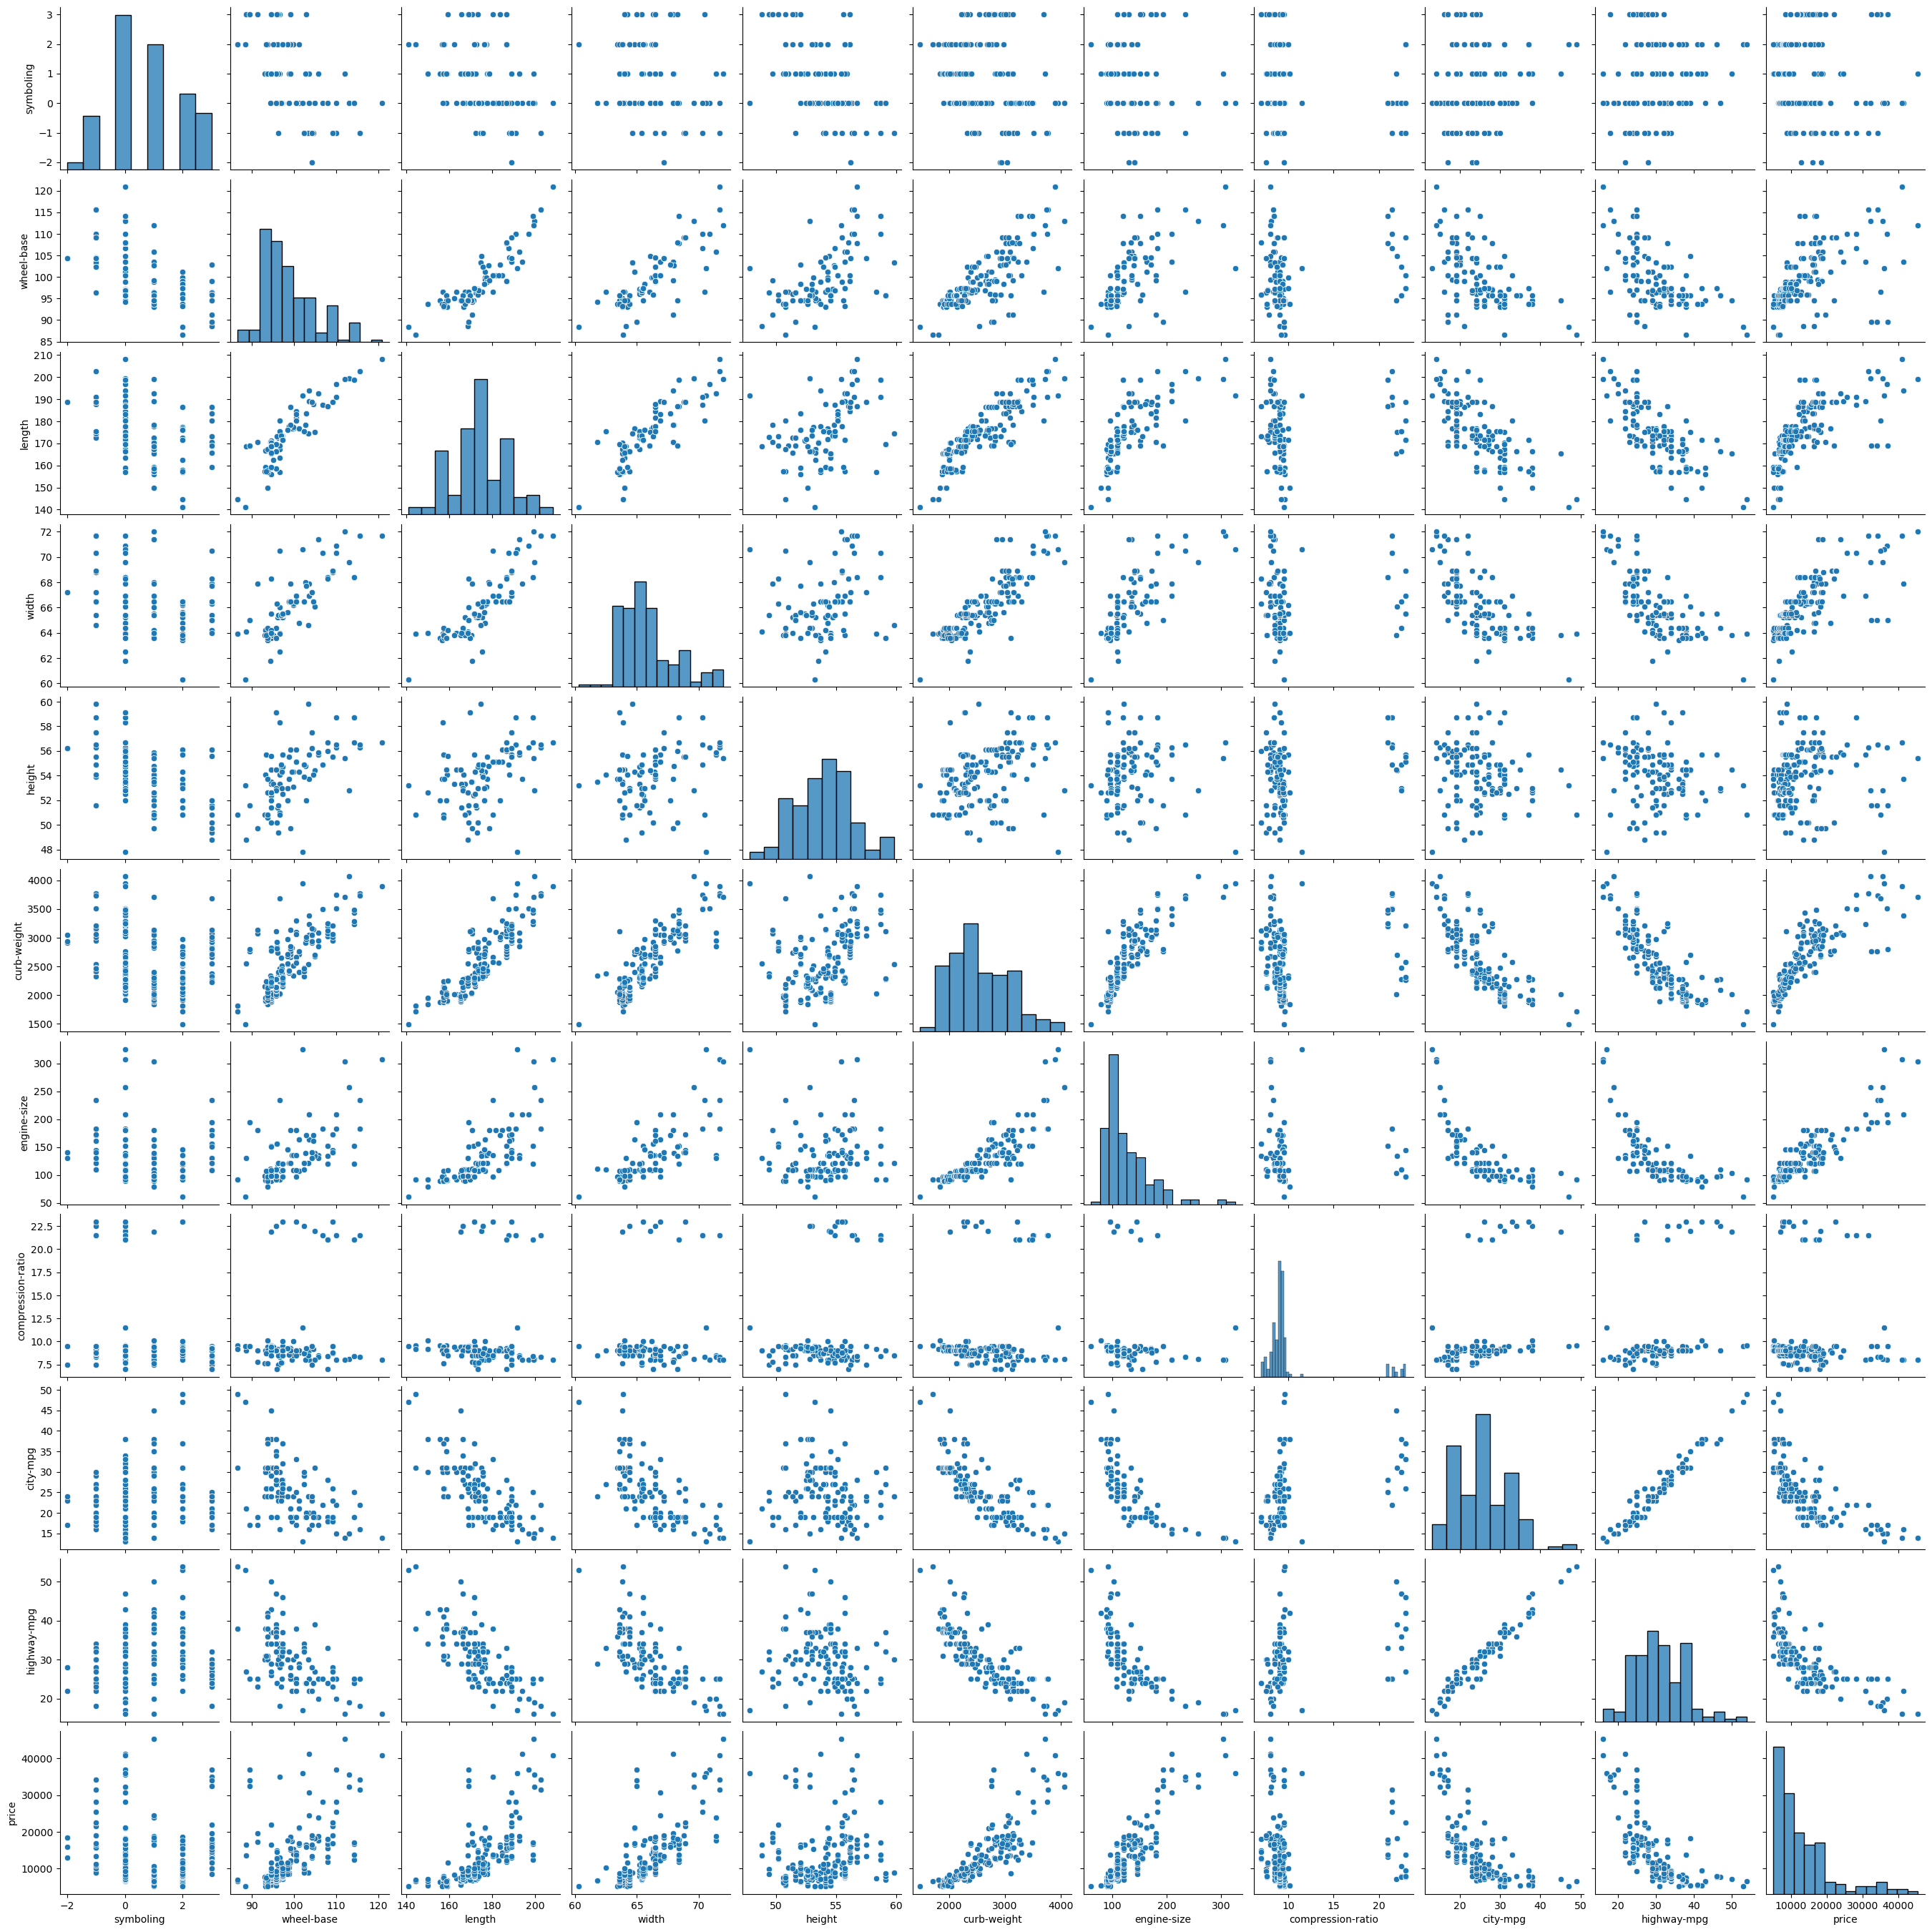

In [54]:
# pairplots to study relationships
sns.pairplot(df_num)

In [55]:
# last row relates to price column
# price is positively correlated with 'wheelbase', 'length', 'width', 'height', 'curbweight','enginesize'
# price is inversely related to 'compression-ratio', 'citympg', 'highwaympg'
# price itself is skewed. Shows that we have more examples of lower price vehicles than higher.
# some columns are nearly linearly related for e.g.citympg and highwaympg
# compression_ratio values are clustered around two levels

### Step 6 : Splitting the data

In [56]:
# for the purpose of demo, two numeric and two categorical features along with price are selected for the next steps.
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [57]:
dfd = df[['num-of-doors','drive-wheels','curb-weight','city-mpg', 'price']]

In [58]:
dfd.shape

(150, 5)

In [59]:
# transform numeric columns using minmax
# onehot encode category columns
# drop original columns which are now transformed

In [60]:
dfd.head()

,num-of-doors,drive-wheels,curb-weight,city-mpg,price
0,two,rwd,2548,21,13495
1,two,rwd,2548,21,16500
2,two,rwd,2823,19,16500
3,four,fwd,2337,24,13950
4,four,4wd,2824,18,17450


In [61]:
dfd_num = dfd.select_dtypes(include='number')
lbl_price = dfd_num.price
dfd_num.drop('price',axis=1,inplace=True)
dfd_cat = dfd.select_dtypes(include='object')

In [62]:
dfd_cat.head(0)

,num-of-doors,drive-wheels


In [63]:
dfd_num.head(0)

,curb-weight,city-mpg


In [64]:
mmscaler = MinMaxScaler()
mmscaler.fit_transform(dfd_num)

array([[0.49356804, 0.19047619],
       [0.49356804, 0.19047619],
       [0.67975626, 0.0952381 ],
       [0.3507109 , 0.33333333],
       [0.68043331, 0.04761905],
       [0.46580907, 0.0952381 ],
       [0.38997969, 0.28571429],
       [0.38997969, 0.28571429],
       [0.60324983, 0.19047619],
       [0.64048747, 0.19047619],
       [0.83683142, 0.14285714],
       [0.03723764, 1.        ],
       [0.06093433, 1.        ],
       [0.03859174, 0.95238095],
       [0.03859174, 0.66666667],
       [0.20920785, 0.33333333],
       [0.10020311, 0.66666667],
       [0.11509817, 0.66666667],
       [0.11509817, 0.66666667],
       [0.48476642, 0.33333333],
       [0.        , 0.66666667],
       [0.01218687, 1.        ],
       [0.08192282, 0.61904762],
       [0.09275559, 0.61904762],
       [0.12931618, 0.61904762],
       [0.13879485, 0.61904762],
       [0.28232905, 0.47619048],
       [0.31821259, 0.47619048],
       [0.32836831, 0.47619048],
       [0.37440758, 0.47619048],
       [0.

In [65]:
dfd_num_rescaled = pd.DataFrame(mmscaler.fit_transform(dfd_num), columns=dfd_num.columns)

In [66]:
ohe = OneHotEncoder()
ohe.fit_transform(dfd_cat).toarray()

array([[0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1.

In [67]:
pd.DataFrame(ohe.fit_transform(dfd_cat).toarray(), columns=ohe.get_feature_names_out())

,num-of-doors_four,num-of-doors_two,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
145,1.0,0.0,0.0,0.0,1.0
146,1.0,0.0,0.0,0.0,1.0
147,1.0,0.0,0.0,0.0,1.0
148,1.0,0.0,0.0,0.0,1.0


In [68]:
dfd_cat_ohe = pd.DataFrame(ohe.fit_transform(dfd_cat).toarray(), columns=ohe.get_feature_names_out())

In [69]:
# check shape of the two dataframes
dfd_num_rescaled.shape, dfd_cat_ohe.shape

((150, 2), (150, 5))

In [70]:
 dfd_xformd = pd.concat([dfd_num_rescaled, dfd_cat_ohe], axis = 1)

In [71]:
# this has all the feature columns
dfd_xformd.head()

,curb-weight,city-mpg,num-of-doors_four,num-of-doors_two,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,0.493568,0.190476,0.0,1.0,0.0,0.0,1.0
1,0.493568,0.190476,0.0,1.0,0.0,0.0,1.0
2,0.679756,0.095238,0.0,1.0,0.0,0.0,1.0
3,0.350711,0.333333,1.0,0.0,0.0,1.0,0.0
4,0.680433,0.047619,1.0,0.0,1.0,0.0,0.0


In [72]:
# this has the label column
lbl_price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
199    18950
200    16845
201    19045
202    21485
204    22625
Name: price, Length: 150, dtype: int64

In [73]:
# separate dataset into features and label
# split into train and test

In [74]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(dfd_xformd, lbl_price, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (105, 7)
y_train (105,)
X_test (45, 7)
y_test (45,)


In [75]:
# fit model on train
# evaluate performance on train and test sets

### Step 7 : Model fitting and evaluating model performance

### 1. KNN Regressor model

In [218]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [249]:
train_preds = knn_reg.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE on train data : ', rmse)

RMSE on train data :  2121.9980162460993


In [255]:
test_preds = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE on test data: ', rmse)

RMSE on test data:  1877.5176891014603


In [251]:
train_MAPE_knn = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_knn) 

MAPE on train data :  0.12654444118152175


In [252]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_train - train_preds)/y_train)

0.12654444118152172

In [254]:
test_mape_knn = mape(y_test, test_preds)

print('MAPE on test data : ', test_mape_knn) 

MAPE on test data :  0.12418193750599248


In [222]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_test - test_preds)/y_test)

0.12418193750599248

In [223]:
# Observations:
# MAPE is consistent between train and test
# train rmse is higher than test rmse

### 2. Linear Regression model

In [262]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train) 

LinearRegression()

In [263]:
train_preds = lr_reg.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE on train data: ', rmse)

RMSE on train data:  2178.5950540252734


In [264]:
test_preds = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE on test data: ', rmse)

RMSE on test data:  2163.050712074201


In [265]:
train_MAPE_lr = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_lr)

MAPE on train data :  0.14736535220064112


In [266]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_train - train_preds)/y_train)

0.14736535220064104

In [267]:
test_mape_lr = mape(y_test, test_preds)

print('MAPE on test data : ', test_mape_lr) 

MAPE on test data :  0.1585860486795505


In [268]:
np.mean(abs(y_test - test_preds)/y_test)

0.15858604867955053

In [ ]:
# Observations:
# RMSE on train data is slightly higher than on test data
# MAPE on train data is slightly lower than on test data

### 3. Decision Tree Regressor model

In [307]:
#Instatiating decision tree regressor with splitting criteria as least square error and maximum depth of 3
dtr_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 3, random_state = 40)

In [308]:
model_dtr = dtr_reg.fit(X_train,y_train) 

In [309]:
train_preds =  model_dtr.predict(X_train)
mse = mean_squared_error(y_train, preds_train_dtr)
rmse = sqrt(mse)
print('RMSE on train data : ', rmse)

RMSE on train data :  1892.8377633092982


In [310]:
test_preds = model_dtr.predict(X_test)
mse = mean_squared_error(y_test, preds_test_dtr)
rmse = sqrt(mse)
print('RMSE on test data : ', rmse)

RMSE on test data :  2172.724327131768


In [311]:
train_MAPE_dtr = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_dtr) 

MAPE on train data :  0.12032078244310777


In [312]:
np.mean(abs(y_train - train_preds)/y_train)

0.12032078244310775

In [313]:
test_MAPE_dtr = mape(y_test, test_preds)

print('MAPE on test data : ', test_MAPE_dtr)

MAPE on test data :  0.14564978783004523


In [314]:
np.mean(abs(y_test - test_preds )/y_test)

0.14564978783004523

In [315]:
# Observations:
# RMSE on train data is lower than test data.
# MAPE on train data is slightly lower than on test data.